## Covid-19 Model Sir

A simple notebook that tests the SIR model.

## References

- [SIR Model](https://pt.wikipedia.org/wiki/Modelo_epid%C3%AAmico#O_Modelo_SIR)
- [COVID-19 Data Brazil - Source 1](https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19_no_Brasil)
- [COVID-19 Data Brazil - Source 2](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Brazil)
- [Inspired by HashLDash](https://www.youtube.com/watch?v=XaNvUEX9Kbc)
![Dedução](sir-model.png)

### Credits to [William Scaff](https://github.com/Huyston)

## Example

## City of Londrina

- Population: 570.000
- Infection rate (beta): 0.01
- Removal rate (gama): 0.0001
- Death rate (gama - heal rate): 0.00002
- Infections in zero day: 3
- Days of simulation: 90

Simulação Modelo SIR - COVID-19




Insira a populacao total:


-> 570000


Insira a taxa de infecção (beta):


-> 0.01


Insira a taxa de remoção (mortes + curados) ou seja (gama):


-> 0.0001


Insira a taxa de mortalidade (taxa de remoção - curados):


-> 0.00002


Insira o número de infectados no dia 0:


-> 3


Insira a quantidade de dias para simular:


-> 90


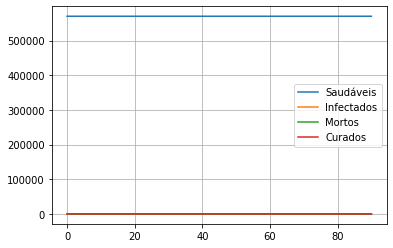

In [1]:
import matplotlib.pyplot as g

class Covid():
    def __init__(self, populacao, beta, gama, tx_morte, infectados=1, curados=0, mortos=0, tempo_simulacao=40):
        self.populacao = populacao
        self.beta = beta
        self.gama = gama
        self.txCura = gama * (1 - tx_morte)
        self.tx_morte = gama * tx_morte
        self.tempo_simulacao = tempo_simulacao
        
        self.S = [(populacao - infectados) / populacao]
        self.I = [infectados / populacao]
        self.M = [mortos / populacao]
        self.C = [curados / populacao]
        self.tempo = [0]
        
    def modelo(self):
        dt = 0.01
        for t in range(int(self.tempo_simulacao / dt)):
            S = self.S[-1] - (self.beta * self.S[-1] * self.I[-1]) * dt
            I = self.I[-1] + (self.beta * self.S[-1] * self.I[-1] - self.gama * self.I[-1]) * dt
            M = self.M[-1] + (self.tx_morte * self.I[-1]) * dt
            C = self.C[-1] + (self.txCura * self.I[-1]) * dt
            tempo = self.tempo[-1] + dt
            
            self.S.append(S)
            self.I.append(I)
            self.M.append(M)
            self.C.append(C)
            self.tempo.append(tempo)
            
        self.S = [s * self.populacao for s in self.S]
        self.I = [i * self.populacao for i in self.I]
        self.M = [m * self.populacao for m in self.M]
        self.C = [c * self.populacao for c in self.C]
        
    def grafico(self):
        g.plot(self.tempo, self.S, label='Saudáveis')
        g.plot(self.tempo, self.I, label='Infectados')
        g.plot(self.tempo, self.M, label='Mortos')
        g.plot(self.tempo, self.C, label='Curados')        
        g.legend()
        g.grid()
        g.plot()

populacao = int(input('Simulação Modelo SIR - COVID-19\n\n\n\n\nInsira a populacao total:\n\n\n-> '))
beta = float(input('\n\nInsira a taxa de infecção (beta):\n\n\n-> '))
gama = float(input('\n\nInsira a taxa de remoção (mortes + curados) ou seja (gama):\n\n\n-> '))
tx_morte = float(input('\n\nInsira a taxa de mortalidade (taxa de remoção - curados):\n\n\n-> '))
infectados = int(input('\n\nInsira o número de infectados no dia 0:\n\n\n-> '))
tempo_simulacao = int(input('\n\nInsira a quantidade de dias para simular:\n\n\n-> '))
covid19 = Covid(populacao=populacao, beta=beta, gama=gama, tx_morte=tx_morte, infectados=infectados, tempo_simulacao=tempo_simulacao)
covid19.modelo()
covid19.grafico()